# CLASSIFICATION (Iris Dataset)

steps
 
1. Load and preprocess Iris  
2. Split into train/test  
3. Train Decision Tree  
4. Train KNN (k=5)  
5. Compare metrics (Accuracy, Precision, Recall, F1)  
6. Visualize the Decision Tree  

The dataset contains 150 samples and 3 classes:  
- Setosa  
- Versicolor  
- Virginica  


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from preprocessing_iris import load_and_split_iris_data


Train a Decision Tree classifier (scikit-learn) on train set.

In [5]:
# We get the raw training/testing split directly from our Task 1 function
X_train, X_test, y_train, y_test = load_and_split_iris_data()

# Decision Tree Classifier with entropy criterion and max depth of 3
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

In [6]:
# Metrics [cite: 110]
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



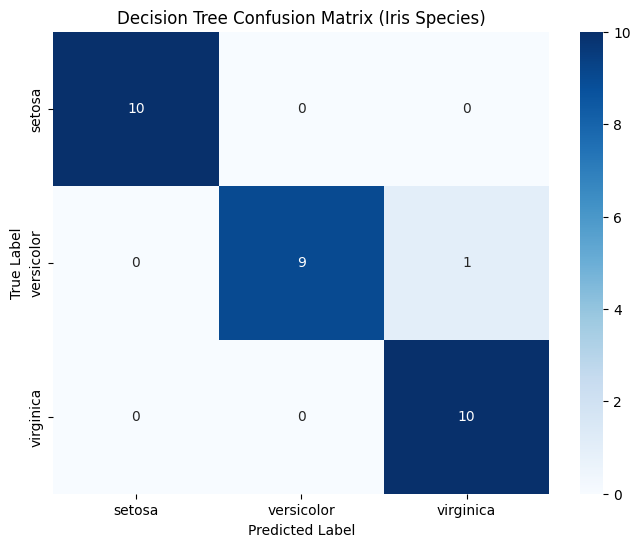

In [14]:
# visualize confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title("Decision Tree Confusion Matrix (Iris Species)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

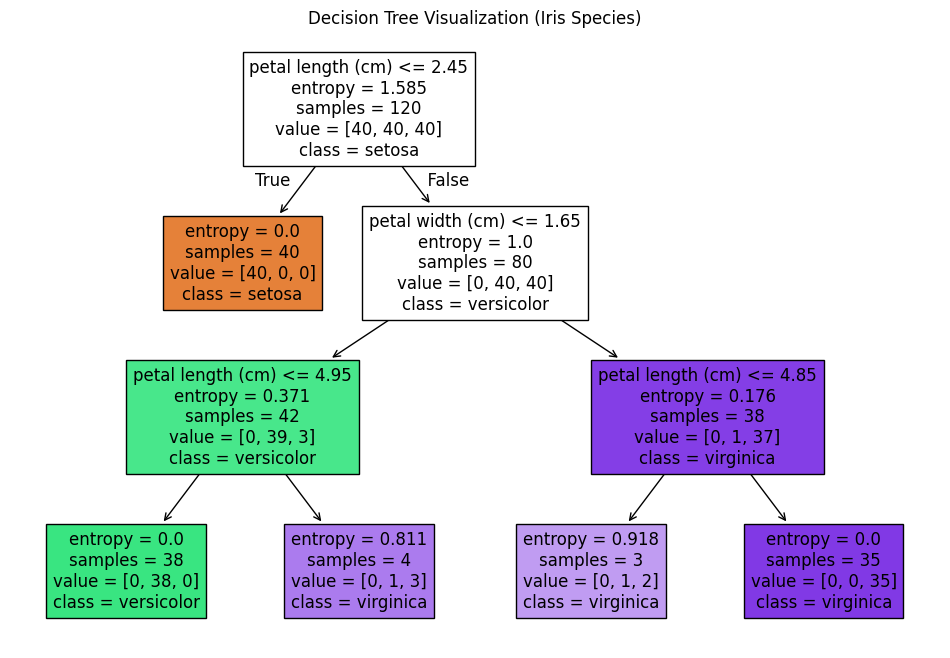

In [ ]:
# Visualization 
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['setosa', 'versicolor', 'virginica'])
plt.title("Decision Tree Visualization (Iris Species)")
# plt.savefig('decision_tree_viz.png') # Uncomment to save image
plt.show()

K-Nearest Neighbors (KNN)

In [11]:
# scale the data for KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize and train (using SCALED data) [cite: 111]
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

In [12]:
# Metrics
print("KNN Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

KNN Metrics:
Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



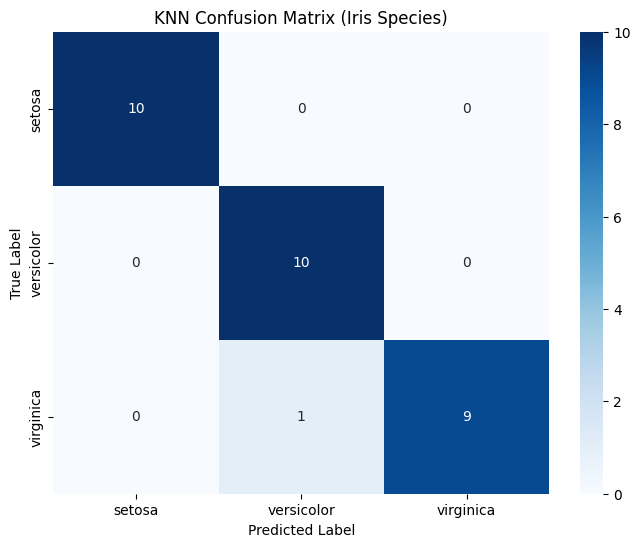

In [13]:
# plot results 
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.title("KNN Confusion Matrix (Iris Species)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Peformance
Both models achieved an identical Accuracy of 96.67% (misclassifying exactly 1 sample out of 30).

Decision Tree Error: Misclassified 1 Class 1 (Versicolor) as Class 2.

KNN Error: Misclassified 1 Class 2 (Virginica) as Class 1.

Since the number of errors is the same, neither is superior in raw predictive power.

